<a href="https://colab.research.google.com/github/shuvoxcd01/Pattern-Recognition-Machine-Learning/blob/master/Polynomial_Curve_Fitting_with_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [0]:
tf.enable_eager_execution()

tf.executing_eagerly()

True

In [0]:
x = tf.random.uniform(shape=(10,))

In [0]:
t = lambda x : tf.sin(2 * np.pi * x)

In [0]:
x= tf.contrib.framework.sort(x,axis=0)

In [0]:
t_noised = t(x) + tf.random.normal(shape=x.shape, mean=0.0, stddev=0.1)

In [0]:
t_noised

<tf.Tensor: id=29, shape=(10,), dtype=float32, numpy=
array([ 0.2509942 ,  0.67500263,  0.73696995,  0.95927674,  0.97075415,
        1.0940214 ,  0.41741002,  0.3103156 , -0.5857195 , -0.31524056],
      dtype=float32)>

In [0]:
_x_s = np.linspace(0,1,1000)

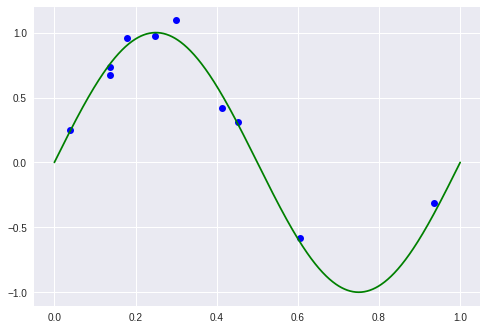

In [0]:
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-')

tf.Tensor(2.6926637, shape=(), dtype=float32) tf.Tensor(1.6926636, shape=(), dtype=float32)
gradient:  tf.Tensor([-2.4260495], shape=(1,), dtype=float32)
tf.Tensor(1.6926636, shape=(), dtype=float32) tf.Tensor(1.6920753, shape=(), dtype=float32)
tf.Tensor(1.6926636, shape=(), dtype=float32) tf.Tensor(1.6920753, shape=(), dtype=float32)
gradient:  tf.Tensor([-2.4236236], shape=(1,), dtype=float32)
tf.Tensor(1.6920753, shape=(), dtype=float32) tf.Tensor(1.6914883, shape=(), dtype=float32)
tf.Tensor(1.6920753, shape=(), dtype=float32) tf.Tensor(1.6914883, shape=(), dtype=float32)
gradient:  tf.Tensor([-2.4212], shape=(1,), dtype=float32)
tf.Tensor(1.6914883, shape=(), dtype=float32) tf.Tensor(1.6909024, shape=(), dtype=float32)
tf.Tensor(1.6914883, shape=(), dtype=float32) tf.Tensor(1.6909024, shape=(), dtype=float32)
gradient:  tf.Tensor([-2.4187787], shape=(1,), dtype=float32)
tf.Tensor(1.6909024, shape=(), dtype=float32) tf.Tensor(1.6903176, shape=(), dtype=float32)
tf.Tensor(1.6909024

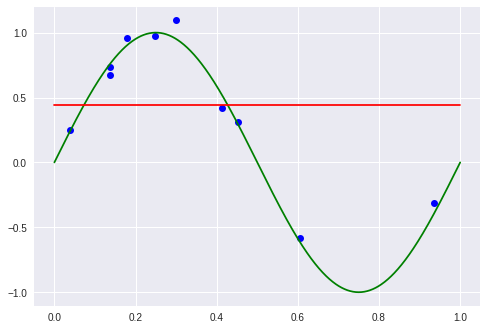

In [0]:
# 0th order polynomial M=0

w = tf.random.normal(shape=(1,))
y = lambda x, w : w[0] * x**0

E = lambda w : 0.5 * tf.reduce_sum(((y(x,w) - t_noised)**2))

def compute_gradient():
    with tf.GradientTape() as g:
        g.watch(w)
        error = E(w)
    grad = g.gradient(error,w)
    return grad

def apply_gradient():
    w = w - grad
    
    
best = E(w) + 1
while E(w) < best:
    print(best, E(w))
    best = E(w)
    g = compute_gradient()
    print('gradient: ', g)
    w -= g*0.0001
    print(best, E(w))
    
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-', _x_s, y(_x_s, w), 'r-')

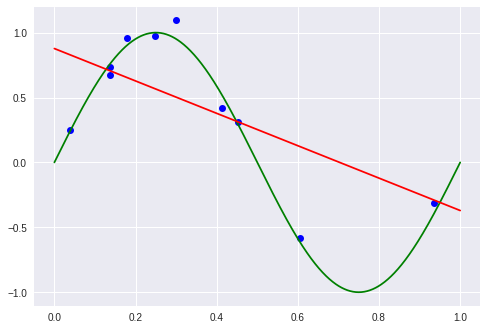

In [11]:
# First order polynomial M=1

w = tf.random.normal(shape=(2,))
y = lambda x, w : w[0] * x**0 + w[1] * x

E = lambda w : 0.5 * tf.reduce_sum(((y(x,w) - t_noised)**2))

L = []

def compute_gradient():
    with tf.GradientTape() as g:
        g.watch(w)
        error = E(w)
        L.append(error)
    grad = g.gradient(error,w)
    return grad

def apply_gradient():
    w = w - grad
    
    
for _ in range(40000):
    g = compute_gradient()
    w -= g*0.0001
    
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-', _x_s, y(_x_s, w), 'r-')

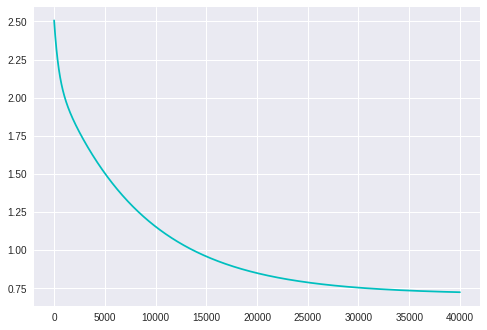

In [12]:
plt.plot(range(40000), L, 'c-' )
plt.xlabel='iter'
plt.ylabel = 'error'
plt.show()

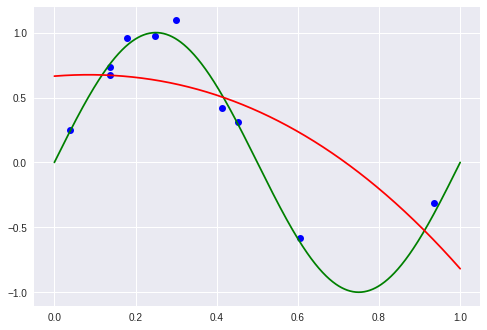

In [13]:
#Third order polynomial M=3

w = tf.random.normal(shape=(4,))
y = lambda x, w : w[0] * x**0 + w[1] * x + w[2] * x**2 + w[3] * x**3

E = lambda w : 0.5 * tf.reduce_sum(((y(x,w) - t_noised)**2))

L = []

def compute_gradient():
    with tf.GradientTape() as g:
        g.watch(w)
        error = E(w)
        L.append(error)
    grad = g.gradient(error,w)
    return grad

def apply_gradient():
    w = w - grad
    
    
for _ in range(40000):
    g = compute_gradient()
    w -= g*0.0001
    
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-', _x_s, y(_x_s, w), 'r-')

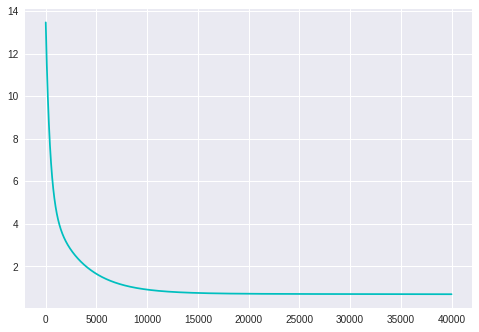

In [14]:
plt.plot(range(40000), L, 'c-' )
plt.xlabel='iter'
plt.ylabel = 'error'
plt.show()

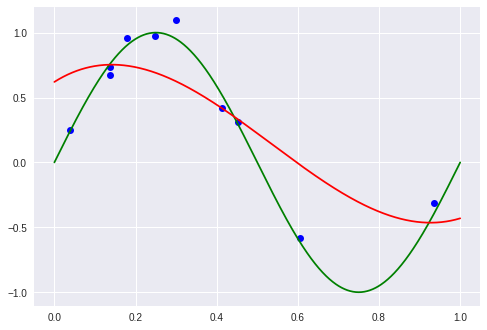

In [15]:
#Third order polynomial M=3 with higher learning rate

w = tf.random.normal(shape=(4,))
y = lambda x, w : w[0] * x**0 + w[1] * x + w[2] * x**2 + w[3] * x**3

E = lambda w : 0.5 * tf.reduce_sum(((y(x,w) - t_noised)**2))

L = []

def compute_gradient():
    with tf.GradientTape() as g:
        g.watch(w)
        error = E(w)
        L.append(error)
    grad = g.gradient(error,w)
    return grad

def apply_gradient():
    w = w - grad
    
    
for _ in range(40000):
    g = compute_gradient()
    w -= g*0.01
    
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-', _x_s, y(_x_s, w), 'r-')

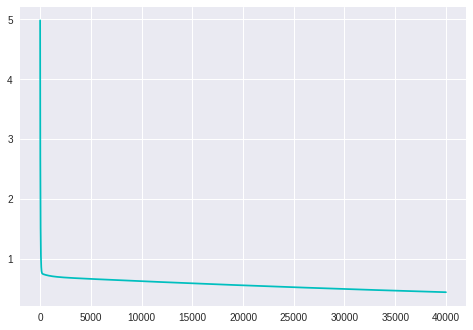

In [16]:
plt.plot(range(40000), L, 'c-' )
plt.xlabel='iter'
plt.ylabel = 'error'
plt.show()

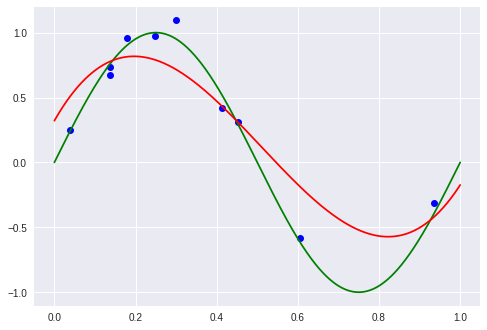

In [24]:
#Third order polynomial M=3 with learning rate = .1

w = tf.random.normal(shape=(4,))
y = lambda x, w : w[0] * x**0 + w[1] * x + w[2] * x**2 + w[3] * x**3

E = lambda w : 0.5 * tf.reduce_sum(((y(x,w) - t_noised)**2))

L = []

def compute_gradient():
    with tf.GradientTape() as g:
        g.watch(w)
        error = E(w)
        L.append(error)
    grad = g.gradient(error,w)
    return grad

def apply_gradient():
    w = w - grad
    
    
for _ in range(10000):
    g = compute_gradient()
    w -= g*0.1
    
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-', _x_s, y(_x_s, w), 'r-')

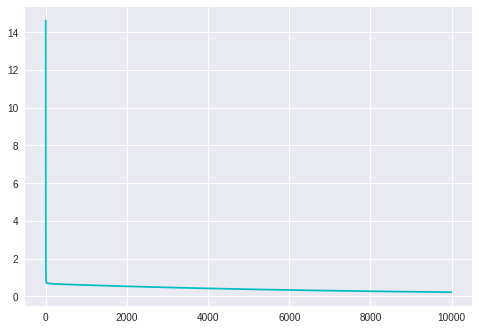

In [25]:
plt.plot(range(10000), L, 'c-' )
plt.xlabel='iter'
plt.ylabel = 'error'
plt.show()

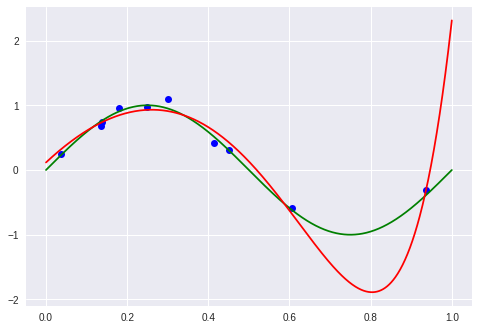

In [26]:
#Ninth order polynomial: M = 9

w = tf.random.normal(shape=(10,))
y = lambda x, w : w[0] * x**0 + w[1] * x + w[2] * x**2 + w[3] * x ** 3 + w[4] * x**4 + w[5] * x**5 + w[6] * x**6 + w[7] * x**7 + w[8] * x**8 + w[9] * x**9


E = lambda w : 0.5 * tf.reduce_sum(((y(x,w) - t_noised)**2))

L = []

def compute_gradient():
    with tf.GradientTape() as g:
        g.watch(w)
        error = E(w)
        L.append(error)
    grad = g.gradient(error,w)
    return grad

def apply_gradient():
    w = w - grad
    
    
for _ in range(10000):
    g = compute_gradient()
    w -= g*0.1
    
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-', _x_s, y(_x_s, w), 'r-')

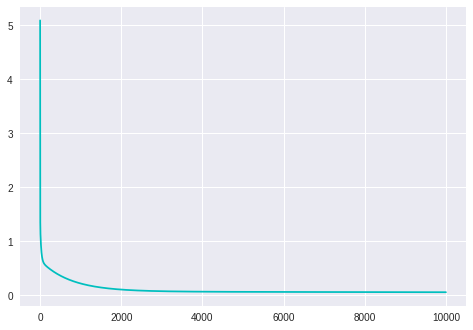

In [27]:
plt.plot(range(10000), L, 'c-' )
plt.xlabel='iter'
plt.ylabel = 'error'
plt.show()

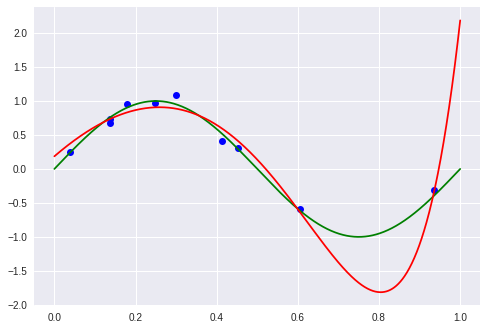

In [17]:
#Ninth order polynomial: M = 9 with higher learning rate

w = tf.random.normal(shape=(10,))
y = lambda x, w : w[0] * x**0 + w[1] * x + w[2] * x**2 + w[3] * x ** 3 + w[4] * x**4 + w[5] * x**5 + w[6] * x**6 + w[7] * x**7 + w[8] * x**8 + w[9] * x**9


E = lambda w : 0.5 * tf.reduce_sum(((y(x,w) - t_noised)**2))

L = []

def compute_gradient():
    with tf.GradientTape() as g:
        g.watch(w)
        error = E(w)
        L.append(error)
    grad = g.gradient(error,w)
    return grad

def apply_gradient():
    w = w - grad
    
    
for _ in range(40000):
    g = compute_gradient()
    w -= g*0.01
    
plt.plot(x,t_noised, 'bo', _x_s, np.sin(2*np.pi*_x_s), 'g-', _x_s, y(_x_s, w), 'r-')

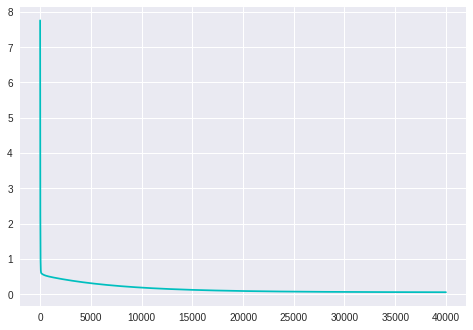

In [18]:
plt.plot(range(40000), L, 'c-' )
plt.xlabel='iter'
plt.ylabel = 'error'
plt.show()